In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c elo-merchant-category-recommendation

 99% 608M/615M [00:05<00:00, 119MB/s]
100% 615M/615M [00:05<00:00, 108MB/s]


In [5]:
!unzip -q elo-merchant-category-recommendation.zip -d dataset/

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [7]:
merchants = pd.read_csv('dataset/merchants.csv')
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [8]:
merchants.isnull().mean()

merchant_id                    0.000000
merchant_group_id              0.000000
merchant_category_id           0.000000
subsector_id                   0.000000
numerical_1                    0.000000
numerical_2                    0.000000
category_1                     0.000000
most_recent_sales_range        0.000000
most_recent_purchases_range    0.000000
avg_sales_lag3                 0.000039
avg_purchases_lag3             0.000000
active_months_lag3             0.000000
avg_sales_lag6                 0.000039
avg_purchases_lag6             0.000000
active_months_lag6             0.000000
avg_sales_lag12                0.000039
avg_purchases_lag12            0.000000
active_months_lag12            0.000000
category_4                     0.000000
city_id                        0.000000
state_id                       0.000000
category_2                     0.035516
dtype: float64

In [9]:
new_tran = pd.read_csv('/content/dataset/new_merchant_transactions.csv')

##Handling Missing Values in new_tran

In [10]:
new_tran.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [11]:
features_with_na=[features for features in new_tran.columns if new_tran[features].isnull().sum()>1]

In [12]:
features_with_na

['category_3', 'merchant_id', 'category_2']

In [13]:
new_tran['category_3'].value_counts()

A    922244
B    836178
C    148687
Name: category_3, dtype: int64

In [14]:
new_tran['category_3'].fillna('A', inplace=True)

In [15]:
new_tran['merchant_id'].value_counts()

M_ID_00a6ca8a8a    23018
M_ID_cd2c0b07e9    19118
M_ID_9139332ccc    14220
M_ID_50f575c681    13778
M_ID_725a60d404     7029
                   ...  
M_ID_5ad92e0a51        1
M_ID_755372244e        1
M_ID_4b750a82b0        1
M_ID_28f7e90c9b        1
M_ID_670cdecb69        1
Name: merchant_id, Length: 226129, dtype: int64

In [16]:
new_tran['merchant_id'].fillna('M_ID_00a6ca8a8a', inplace=True)

In [17]:
new_tran['category_2'].value_counts()

1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: category_2, dtype: int64

In [18]:
new_tran['category_2'].fillna(1.0, inplace=True)

In [19]:
new_tran.isnull().sum()

authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [20]:
train_EDA = pd.read_csv("drive/MyDrive/train_EDA.csv")

In [21]:
train_EDA.shape

(201917, 9)

In [22]:
new_tran.shape

(1963031, 14)

In [23]:
elo_data = pd.merge(train_EDA, new_tran, how="left", on=["card_id"])

In [24]:
elo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241616 entries, 0 to 1241615
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1241616 non-null  int64  
 1   first_active_month    1241616 non-null  object 
 2   card_id               1241616 non-null  object 
 3   feature_1             1241616 non-null  int64  
 4   feature_2             1241616 non-null  int64  
 5   feature_3             1241616 non-null  int64  
 6   target                1241616 non-null  float64
 7   year                  1241616 non-null  int64  
 8   month                 1241616 non-null  int64  
 9   authorized_flag       1219685 non-null  object 
 10  city_id               1219685 non-null  float64
 11  category_1            1219685 non-null  object 
 12  installments          1219685 non-null  float64
 13  category_3            1219685 non-null  object 
 14  merchant_category_id  1219685 non-

##Handling missing values in elo_data

In [25]:
elo_data.isnull().mean()

Unnamed: 0              0.000000
first_active_month      0.000000
card_id                 0.000000
feature_1               0.000000
feature_2               0.000000
feature_3               0.000000
target                  0.000000
year                    0.000000
month                   0.000000
authorized_flag         0.017663
city_id                 0.017663
category_1              0.017663
installments            0.017663
category_3              0.017663
merchant_category_id    0.017663
merchant_id             0.017663
month_lag               0.017663
purchase_amount         0.017663
purchase_date           0.017663
category_2              0.017663
state_id                0.017663
subsector_id            0.017663
dtype: float64

In [26]:
elo_data.shape

(1241616, 22)

In [27]:
features_with_na=[features for features in elo_data.columns if elo_data[features].isnull().sum()>1]

In [28]:
features_with_na

['authorized_flag',
 'city_id',
 'category_1',
 'installments',
 'category_3',
 'merchant_category_id',
 'merchant_id',
 'month_lag',
 'purchase_amount',
 'purchase_date',
 'category_2',
 'state_id',
 'subsector_id']

In [29]:
for i in features_with_na:
  elo_data[i].fillna(elo_data[i].mode()[0], inplace=True)

In [30]:
elo_data.isnull().sum()

Unnamed: 0              0
first_active_month      0
card_id                 0
feature_1               0
feature_2               0
feature_3               0
target                  0
year                    0
month                   0
authorized_flag         0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [31]:
elo_data.drop('Unnamed: 0',inplace=True,axis=1)

##Numerical Variables

In [32]:
# list of numerical variables
numerical_features = [feature for feature in elo_data.columns if elo_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
elo_data[numerical_features].head()

Number of numerical variables:  14


,feature_1,feature_2,feature_3,target,year,month,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
0,5,2,1,-0.820283,2017,6,19.0,0.0,80.0,1.0,-0.491457,1.0,9.0,37.0
1,5,2,1,-0.820283,2017,6,69.0,0.0,80.0,2.0,-0.666561,1.0,9.0,37.0
2,5,2,1,-0.820283,2017,6,19.0,0.0,278.0,1.0,-0.635246,1.0,9.0,37.0
3,5,2,1,-0.820283,2017,6,69.0,0.0,842.0,2.0,-0.581180,1.0,9.0,37.0
4,5,2,1,-0.820283,2017,6,276.0,0.0,783.0,1.0,-0.296112,1.0,9.0,19.0


##handling Discrete Vars

In [33]:
for i in numerical_features:
  print(i,len(elo_data[i].unique()))

feature_1 5
feature_2 3
feature_3 2
target 197110
year 8
month 12
city_id 308
installments 15
merchant_category_id 306
month_lag 2
purchase_amount 61279
category_2 5
state_id 25
subsector_id 41


In [34]:
elo_data.drop('merchant_category_id',inplace=True, axis=1)

In [35]:
continuous_values = ['purchase_amount']

In [36]:
discrete_values = ['feature_1',
 'feature_2',
 'feature_3',
 'year',
 'month',
 'installments',
 'month_lag',
 'category_2',
 'state_id',
 'subsector_id']

In [37]:
discrete_values

['feature_1',
 'feature_2',
 'feature_3',
 'year',
 'month',
 'installments',
 'month_lag',
 'category_2',
 'state_id',
 'subsector_id']

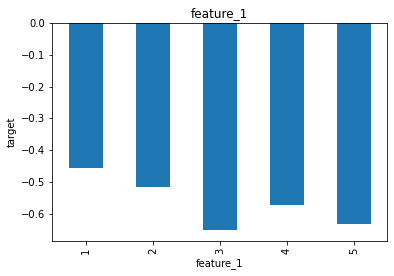

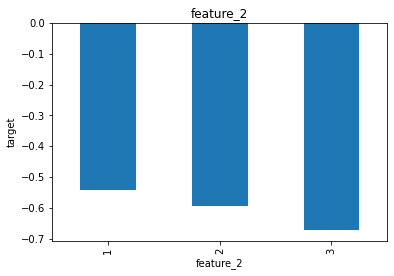

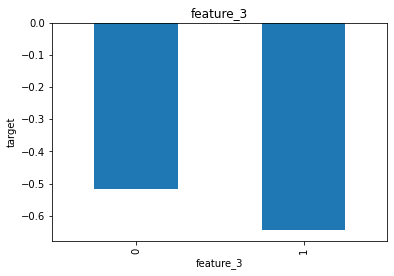

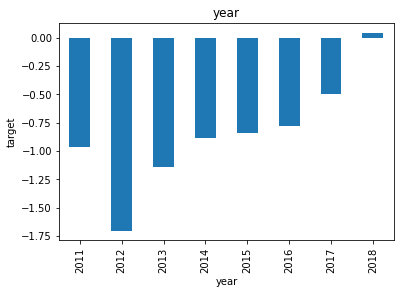

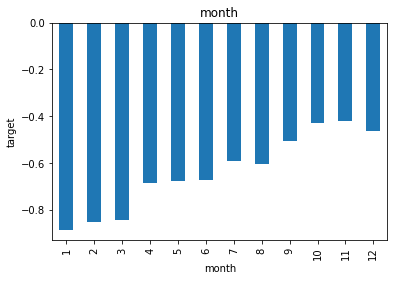

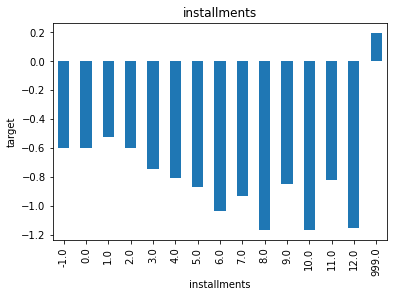

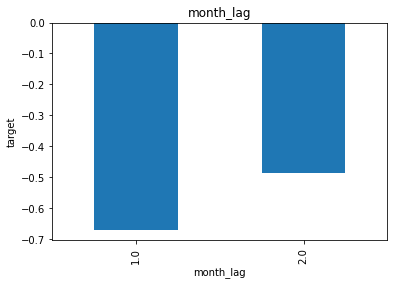

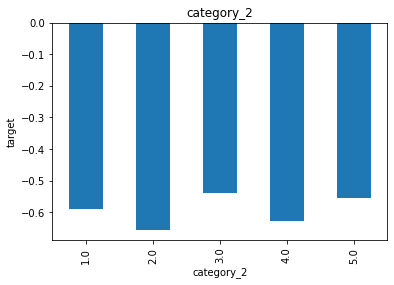

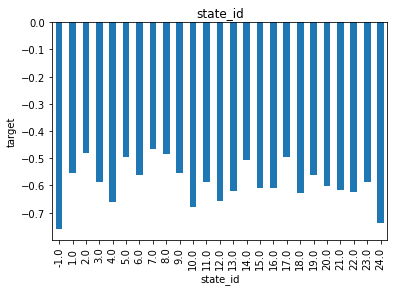

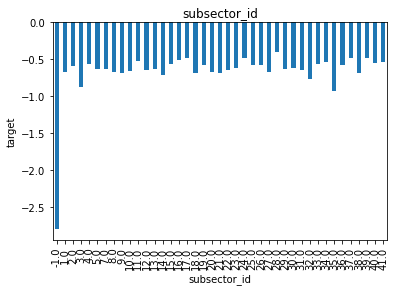

In [38]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_values:
    data=elo_data.copy()
    data.groupby(feature)['target'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(feature)
    plt.show()

picking the relevant discrete values

In [39]:
discrete_values = ['feature_1',
 'feature_2',
 'feature_3',
 'year',
 'month',
 'installments',
 'month_lag',]

drop rest of the discrete features

In [40]:
discrete_drop_list = ['category_2', 'state_id', 'subsector_id']

In [41]:
elo_data.drop(discrete_drop_list, inplace=True,axis=1)

##Handling continuous vars

'purchase_amount' do not show any relation with target values, so drop it

In [42]:
elo_data.drop('purchase_amount',inplace=True,axis=1)

##Handling categorical data

In [43]:
categorical_features=[feature for feature in elo_data.columns if elo_data[feature].dtypes=='O']
categorical_features

['first_active_month',
 'card_id',
 'authorized_flag',
 'category_1',
 'category_3',
 'merchant_id',
 'purchase_date']

In [44]:
for i in categorical_features:
  print(i,len(elo_data[i].unique()))

first_active_month 75
card_id 201917
authorized_flag 1
category_1 2
category_3 3
merchant_id 193809
purchase_date 1095261


In [45]:
for i in categorical_features:
  print(i, elo_data[i].value_counts())

first_active_month 2017-11    105351
2017-10    101691
2017-12     97818
2017-09     95120
2017-08     91182
            ...  
2012-03        59
2012-02        40
2011-11        29
2011-12         4
2018-02         1
Name: first_active_month, Length: 75, dtype: int64
card_id C_ID_b7ebee6539    109
C_ID_c729288535    106
C_ID_8946508722    104
C_ID_4e8e856f1a     99
C_ID_8e0c15d39b     95
                  ... 
C_ID_a5989cd2ab      1
C_ID_36bc03e6f8      1
C_ID_827ea66312      1
C_ID_6c126bd7ff      1
C_ID_84e4ce845a      1
Name: card_id, Length: 201917, dtype: int64
authorized_flag Y    1241616
Name: authorized_flag, dtype: int64
category_1 N    1202505
Y      39111
Name: category_1, dtype: int64
category_3 A    629476
B    519792
C     92348
Name: category_3, dtype: int64
merchant_id M_ID_00a6ca8a8a    52571
M_ID_cd2c0b07e9    11810
M_ID_9139332ccc     8824
M_ID_50f575c681     8598
M_ID_725a60d404     4356
                   ...  
M_ID_801b170de0        1
M_ID_e87011ef35        1
M_ID

In [46]:
categorical_features = [
 'category_1',
 'category_3',]

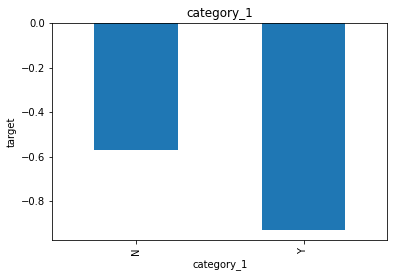

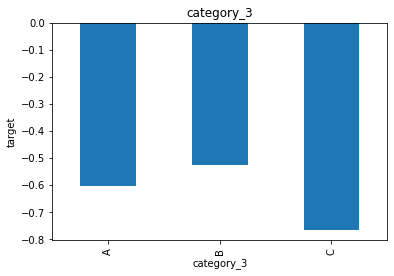

In [47]:
for feature in categorical_features:
    data=elo_data.copy()
    data.groupby(feature)['target'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(feature)
    plt.show()

In [48]:
dict1={'N':0,'Y':1}
dict2={'A':1,'B':0,'C':2}

In [49]:
elo_data['category_1']=elo_data['category_1'].map(dict1)
elo_data['category_3']=elo_data['category_3'].map(dict2)

In [50]:
categorical_drop_list = ['first_active_month',
 'authorized_flag',
 'merchant_id']

In [51]:
elo_data.drop(categorical_drop_list, inplace=True, axis=1)

In [52]:
elo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241616 entries, 0 to 1241615
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   card_id        1241616 non-null  object 
 1   feature_1      1241616 non-null  int64  
 2   feature_2      1241616 non-null  int64  
 3   feature_3      1241616 non-null  int64  
 4   target         1241616 non-null  float64
 5   year           1241616 non-null  int64  
 6   month          1241616 non-null  int64  
 7   city_id        1241616 non-null  float64
 8   category_1     1241616 non-null  int64  
 9   installments   1241616 non-null  float64
 10  category_3     1241616 non-null  int64  
 11  month_lag      1241616 non-null  float64
 12  purchase_date  1241616 non-null  object 
dtypes: float64(4), int64(7), object(2)
memory usage: 132.6+ MB


In [53]:
elo_data['purchase_date'] = pd.to_datetime(elo_data['purchase_date'], format = '%Y-%m-%d %H:%M:%S')

In [54]:
elo_data['purchase_date_year'] = elo_data['purchase_date'].dt.year
elo_data['purchase_date_month'] = elo_data['purchase_date'].dt.month
elo_data['purchase_date_week'] = elo_data['purchase_date'].dt.week
elo_data['purchase_date_day'] = elo_data['purchase_date'].dt.day
elo_data['purchase_date_hour'] = elo_data['purchase_date'].dt.hour
elo_data['purchase_date_minute'] = elo_data['purchase_date'].dt.minute
elo_data['purchase_date_dayofweek'] = elo_data['purchase_date'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
elo_data.drop("purchase_date",inplace=True, axis=1)

In [56]:
date_features = ['purchase_date_year', 'purchase_date_month', 'purchase_date_week', 'purchase_date_day', 'purchase_date_hour', 'purchase_date_minute', 'purchase_date_dayofweek']

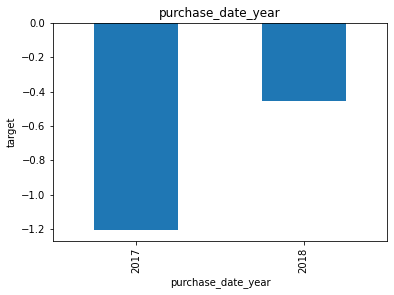

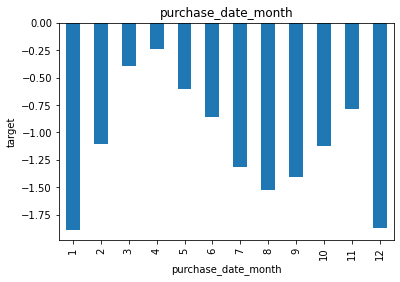

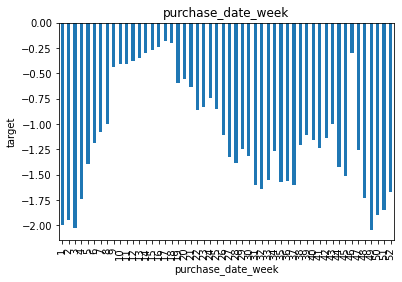

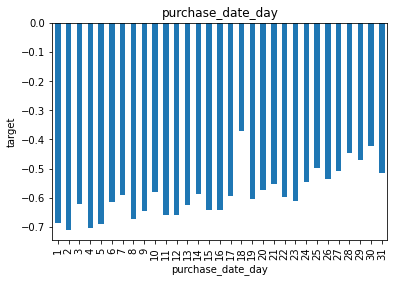

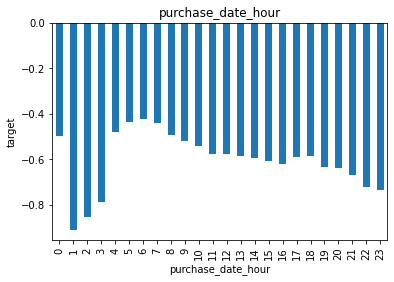

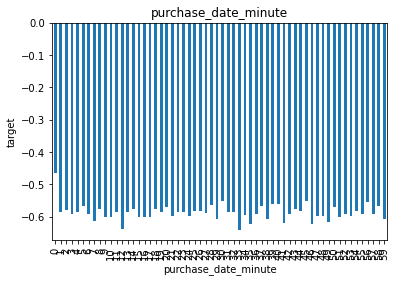

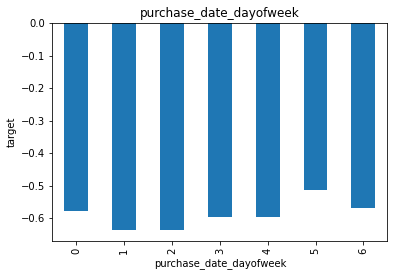

In [57]:
for feature in date_features:
    data=elo_data.copy()
    data.groupby(feature)['target'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('target')
    plt.title(feature)
    plt.show()

In [58]:
from sklearn.preprocessing import KBinsDiscretizer

In [59]:
est1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

In [60]:
data = elo_data.copy()

In [61]:
est1.fit(data[['purchase_date_week']])

KBinsDiscretizer(encode='ordinal')

In [62]:
data[['purchase_date_week']] = est1.transform(data[['purchase_date_week']])

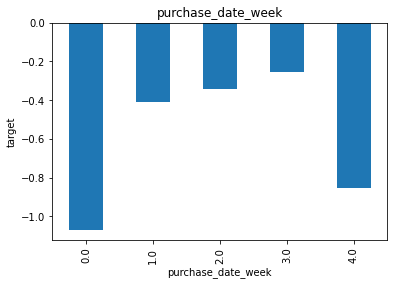

In [63]:
data.groupby('purchase_date_week')['target'].mean().plot.bar()
plt.xlabel('purchase_date_week')
plt.ylabel('target')
plt.title('purchase_date_week')
plt.show()

In [64]:
est2 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

In [65]:
est2.fit(data[['purchase_date_day']])

KBinsDiscretizer(encode='ordinal', n_bins=3)

In [66]:
data[['purchase_date_day']] = est2.transform(data[['purchase_date_day']])

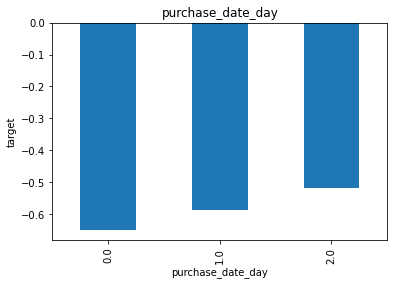

In [67]:
data.groupby('purchase_date_day')['target'].mean().plot.bar()
plt.xlabel('purchase_date_day')
plt.ylabel('target')
plt.title('purchase_date_day')
plt.show()

In [68]:
est3 = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

In [69]:
est3.fit(data[['purchase_date_hour']])

KBinsDiscretizer(encode='ordinal', n_bins=3)

In [70]:
data[['purchase_date_hour']] = est3.transform(data[['purchase_date_hour']])

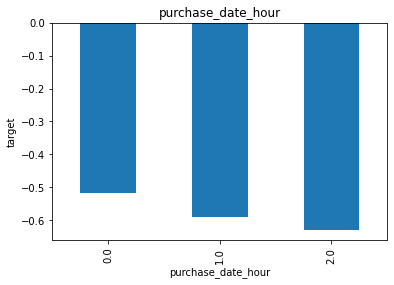

In [71]:
data.groupby('purchase_date_hour')['target'].mean().plot.bar()
plt.xlabel('purchase_date_hour')
plt.ylabel('target')
plt.title('purchase_date_hour')
plt.show()

In [72]:
elo_data[['purchase_date_week']] = est1.transform(elo_data[['purchase_date_week']])
elo_data[['purchase_date_day']] = est2.transform(elo_data[['purchase_date_day']])
elo_data[['purchase_date_hour']] = est3.transform(elo_data[['purchase_date_hour']])

In [73]:
date_drop_list = ['purchase_date_dayofweek', 'purchase_date_minute']

In [74]:
elo_data.drop(date_drop_list, inplace=True, axis=1)

In [75]:
elo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241616 entries, 0 to 1241615
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   card_id              1241616 non-null  object 
 1   feature_1            1241616 non-null  int64  
 2   feature_2            1241616 non-null  int64  
 3   feature_3            1241616 non-null  int64  
 4   target               1241616 non-null  float64
 5   year                 1241616 non-null  int64  
 6   month                1241616 non-null  int64  
 7   city_id              1241616 non-null  float64
 8   category_1           1241616 non-null  int64  
 9   installments         1241616 non-null  float64
 10  category_3           1241616 non-null  int64  
 11  month_lag            1241616 non-null  float64
 12  purchase_date_year   1241616 non-null  int64  
 13  purchase_date_month  1241616 non-null  int64  
 14  purchase_date_week   1241616 non-null  float64
 15

In [144]:
elo_data.to_csv('train_dataset.csv')

In [76]:
X = elo_data.drop(["card_id","target"],axis=1)
y = elo_data["target"]

In [77]:
X.shape

(1241616, 15)

In [78]:
final_columns = X.columns

In [79]:
final_columns

Index(['feature_1', 'feature_2', 'feature_3', 'year', 'month', 'city_id',
       'category_1', 'installments', 'category_3', 'month_lag',
       'purchase_date_year', 'purchase_date_month', 'purchase_date_week',
       'purchase_date_day', 'purchase_date_hour'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
regressor = DecisionTreeRegressor(max_depth=6, random_state=42)

In [84]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [85]:
y_train_pred = regressor.predict(X_train)

In [86]:
mean_squared_error(y_train,y_train_pred,squared=False)

2.928565068685497

In [87]:
y_test_pred = regressor.predict(X_test)

In [88]:
mean_squared_error(y_test,y_test_pred,squared=False)

2.9198713894575867

##Manipulate the test data

In [89]:
test_dataset = pd.read_csv('dataset/test.csv')

In [90]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


In [91]:
test_dataset.shape

(123623, 5)

In [92]:
test_dataset["year"]=0
test_dataset["first_active_month"] = test_dataset["first_active_month"].fillna("2017-09")
for i in range(test_dataset.shape[0]):
  test_dataset['year'][i] = int(test_dataset.iloc[i][0][0:4])
test_dataset["month"]=0
for i in range(test_dataset.shape[0]):
  test_dataset['month'][i] = int(test_dataset.iloc[i][0][5:7])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [93]:
test_merged = pd.merge(test_dataset, new_tran, how="left", on=["card_id"])

In [94]:
test_merged.shape

(756954, 20)

In [95]:
test_merged.isnull().mean()

first_active_month      0.000000
card_id                 0.000000
feature_1               0.000000
feature_2               0.000000
feature_3               0.000000
year                    0.000000
month                   0.000000
authorized_flag         0.017977
city_id                 0.017977
category_1              0.017977
installments            0.017977
category_3              0.017977
merchant_category_id    0.017977
merchant_id             0.017977
month_lag               0.017977
purchase_amount         0.017977
purchase_date           0.017977
category_2              0.017977
state_id                0.017977
subsector_id            0.017977
dtype: float64

In [96]:
features_with_na=[features for features in test_merged.columns if test_merged[features].isnull().sum()>0]

In [97]:
features_with_na

['authorized_flag',
 'city_id',
 'category_1',
 'installments',
 'category_3',
 'merchant_category_id',
 'merchant_id',
 'month_lag',
 'purchase_amount',
 'purchase_date',
 'category_2',
 'state_id',
 'subsector_id']

In [98]:
for i in features_with_na:
  test_merged[i].fillna(test_merged[i].mode()[0], inplace=True)

In [99]:
test_merged.isnull().sum()

first_active_month      0
card_id                 0
feature_1               0
feature_2               0
feature_3               0
year                    0
month                   0
authorized_flag         0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [100]:
dict1={'N':0,'Y':1}
dict2={'A':1,'B':0,'C':2}

In [101]:
test_merged['category_1']=test_merged['category_1'].map(dict1)
test_merged['category_3']=test_merged['category_3'].map(dict2)

In [102]:
test_merged['purchase_date'] = pd.to_datetime(test_merged['purchase_date'], format = '%Y-%m-%d %H:%M:%S')

In [103]:
test_merged['purchase_date_year'] = test_merged['purchase_date'].dt.year
test_merged['purchase_date_month'] = test_merged['purchase_date'].dt.month
test_merged['purchase_date_week'] = test_merged['purchase_date'].dt.week
test_merged['purchase_date_day'] = test_merged['purchase_date'].dt.day
test_merged['purchase_date_hour'] = test_merged['purchase_date'].dt.hour
test_merged['purchase_date_minute'] = test_merged['purchase_date'].dt.minute
test_merged['purchase_date_dayofweek'] = test_merged['purchase_date'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
test_merged.drop("purchase_date",inplace=True, axis=1)

In [105]:
date_features = ['purchase_date_year', 'purchase_date_month', 'purchase_date_week', 'purchase_date_day', 'purchase_date_hour', 'purchase_date_minute', 'purchase_date_dayofweek']

In [106]:
test_merged[['purchase_date_week']] = est1.transform(test_merged[['purchase_date_week']])
test_merged[['purchase_date_day']] = est2.transform(test_merged[['purchase_date_day']])
test_merged[['purchase_date_hour']] = est3.transform(test_merged[['purchase_date_hour']])

In [107]:
final_columns

Index(['feature_1', 'feature_2', 'feature_3', 'year', 'month', 'city_id',
       'category_1', 'installments', 'category_3', 'month_lag',
       'purchase_date_year', 'purchase_date_month', 'purchase_date_week',
       'purchase_date_day', 'purchase_date_hour'],
      dtype='object')

In [108]:
fets = ['feature_1', 'feature_2', 'feature_3', 'year', 'month', 'city_id',
       'category_1', 'installments', 'category_3', 'month_lag',
       'purchase_date_year', 'purchase_date_month', 'purchase_date_week',
       'purchase_date_day', 'purchase_date_hour','card_id']

In [109]:
test_merged = test_merged[fets]

In [113]:
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756954 entries, 0 to 756953
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   feature_1            756954 non-null  int64  
 1   feature_2            756954 non-null  int64  
 2   feature_3            756954 non-null  int64  
 3   year                 756954 non-null  int64  
 4   month                756954 non-null  int64  
 5   city_id              756954 non-null  float64
 6   category_1           756954 non-null  int64  
 7   installments         756954 non-null  float64
 8   category_3           756954 non-null  int64  
 9   month_lag            756954 non-null  float64
 10  purchase_date_year   756954 non-null  int64  
 11  purchase_date_month  756954 non-null  int64  
 12  purchase_date_week   756954 non-null  float64
 13  purchase_date_day    756954 non-null  float64
 14  purchase_date_hour   756954 non-null  float64
 15  card_id          

In [138]:
X_test = test_merged.groupby(['card_id'])[test_merged.columns].median()

In [139]:
X_test.shape

(123623, 15)

In [140]:
X_test.head()

,feature_1,feature_2,feature_3,year,month,city_id,category_1,installments,category_3,month_lag,purchase_date_year,purchase_date_month,purchase_date_week,purchase_date_day,purchase_date_hour
card_id,,,,,,,,,,,,,,,
C_ID_0001238066,4.0,1.0,0.0,2017.0,9.0,291.0,0.0,1.0,0.0,1.0,2018.0,3.0,2.0,1.5,2.0
C_ID_0001793786,5.0,2.0,1.0,2017.0,1.0,87.0,0.0,0.0,1.0,1.0,2017.0,11.0,4.0,2.0,1.0
C_ID_00024e244b,2.0,2.0,0.0,2016.0,8.0,69.0,0.0,0.0,1.0,1.0,2017.0,11.0,4.0,1.0,0.0
C_ID_0002709b5a,5.0,1.0,1.0,2015.0,8.0,103.0,0.0,1.0,0.0,1.0,2018.0,3.0,0.0,0.0,1.0
C_ID_000298032a,2.0,2.0,0.0,2016.0,12.0,23.0,0.0,0.0,1.0,2.0,2018.0,3.0,2.0,2.0,2.0


In [141]:
X_test = X_test.reindex(index=test_dataset['card_id'])
X_test = X_test.reset_index()

In [143]:
X_test.to_csv("test_dataset.csv")

In [124]:
submission = X_test[final_columns]

In [125]:
y_pred = regressor.predict(submission)

In [126]:
submission['target'] = y_pred

In [127]:
submission.head()

,feature_1,feature_2,feature_3,year,month,city_id,category_1,installments,category_3,month_lag,purchase_date_year,purchase_date_month,purchase_date_week,purchase_date_day,purchase_date_hour,target
0,3.0,3.0,1.0,2017.0,4.0,79.0,0.0,1.0,0.0,2.0,2018.0,2.0,0.0,1.0,1.0,-1.391072
1,2.0,3.0,0.0,2017.0,1.0,117.0,0.0,1.0,0.0,1.0,2018.0,3.0,1.0,1.0,2.0,-0.221034
2,5.0,1.0,1.0,2017.0,8.0,166.0,0.5,5.5,1.0,1.0,2018.0,3.0,0.5,0.5,1.0,-0.436862
3,2.0,1.0,0.0,2017.0,12.0,69.0,0.0,2.0,1.0,1.0,2018.0,3.0,2.0,0.0,2.0,-0.436862
4,5.0,1.0,1.0,2015.0,12.0,277.0,0.0,1.0,0.0,1.0,2018.0,3.0,1.0,0.0,0.5,-0.292302


In [128]:
X_test['target'] = y_pred

In [131]:
submission = X_test[['card_id','target']]

In [133]:
submission.shape

(123623, 2)

In [135]:
submission.head()

,card_id,target
0,C_ID_0ab67a22ab,-1.391072
1,C_ID_130fd0cbdd,-0.221034
2,C_ID_b709037bc5,-0.436862
3,C_ID_d27d835a9f,-0.436862
4,C_ID_2b5e3df5c2,-0.292302


In [137]:
submission.to_csv("submission3.csv", index=False)